# AS.171.205: Beautiful Data: Introduction to Practical Data Science
## Teacher: Alex Szalay
## Fall 2015
See also: http://www.sdss.jhu.edu/~szalay/class/2015/data.htm

For data files see:http://www.sdss.jhu.edu/~szalay/class/2015/data/

### Homework 2.3
http://www.sdss.jhu.edu/~szalay/class/2015/Homework-2.pdf

Calculate the frequency spectrum of the sounds given in the two files nylon.wav and
strat.wav. Determine the frequency of the fundamental.

In [96]:
import wave
import matplotlib.pyplot as plt
from numpy import fft
import numpy as np

In [97]:
# from https://gist.github.com/WarrenWeckesser/7461781
def _wav2array(nchannels, sampwidth, data):
    """data must be the string containing the bytes from the wav file."""
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.fromstring(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        # 8 bit samples are stored as unsigned ints; others as signed ints.
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.fromstring(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result


def readwav(file):
    """
    Read a wav file.

    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.

    This function does not read compressed wav files.
    """
    wav = wave.open(file)
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array


In [98]:
rate, sampwidth, arr = readwav('nylon.wav')
### BAD arr2=np.array(list(arr)+list(reversed(arr))) # make periodic

# only pad with zeros
arr2=np.zeros(2*len(arr))
arr2[:len(arr)]=list(arr)

farr=fft.fft(arr2)/len(arr2)
freqs = fft.fftfreq(arr2.size,1/rate)
pk=np.abs(farr)**2
idx = np.argsort(freqs)

(0, 1000)

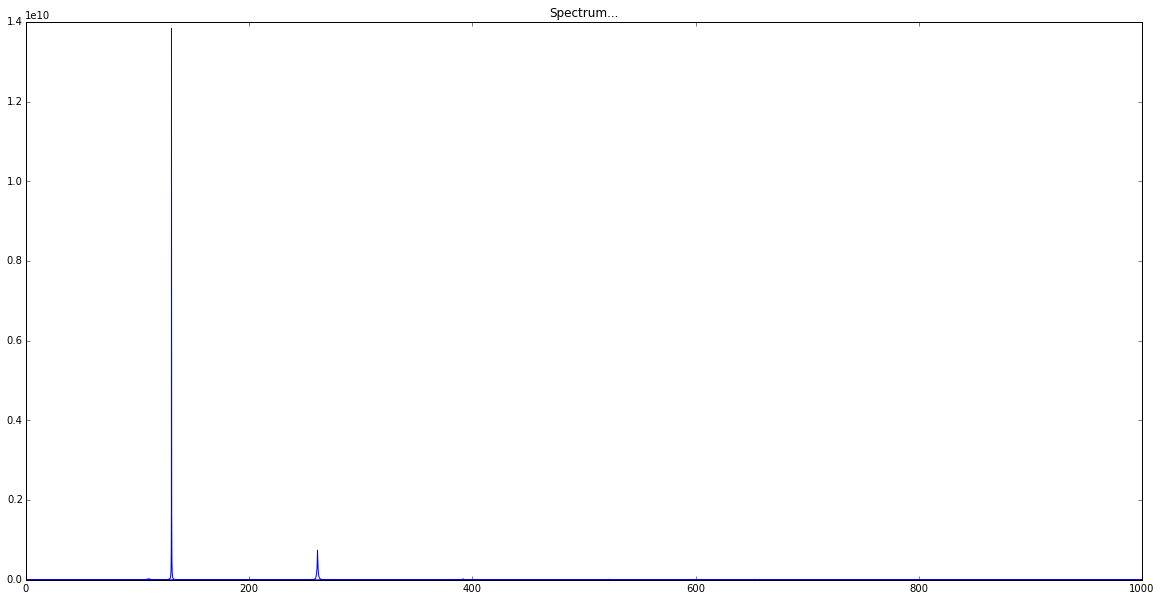

In [101]:
fig=plt.figure(1)
fig.set_size_inches(20, 10, forward=True)
plt.title('Spectrum...')
plt.plot(freqs,pk)
plt.xlim(00,1000)
#plt.ylim(0 ,1e7)

(35000, 40000)

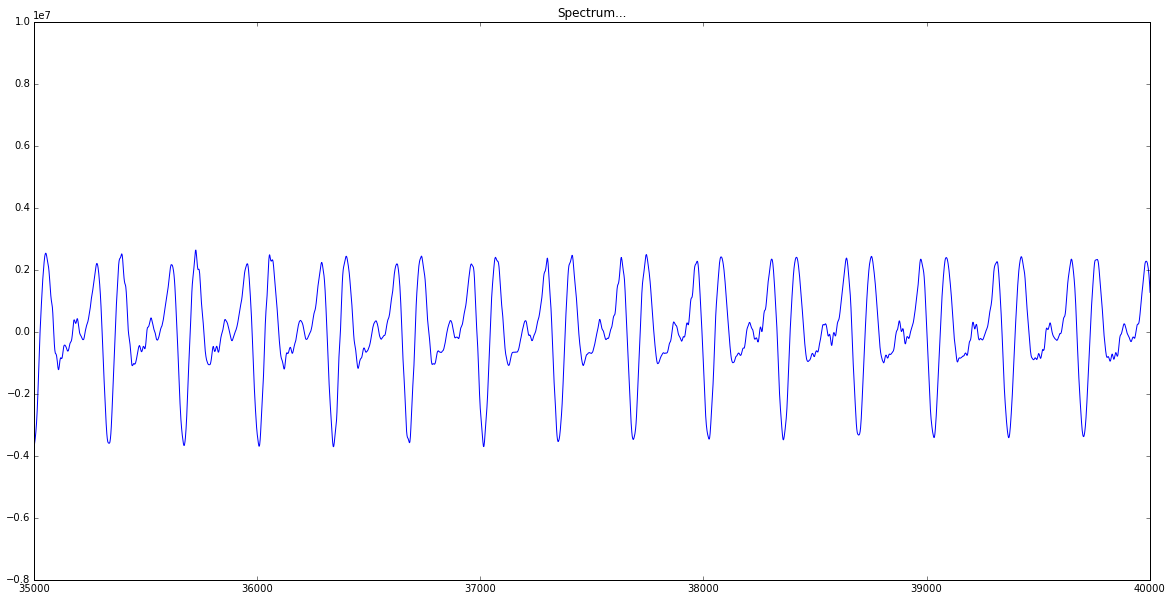

In [58]:
fig=plt.figure(1)
fig.set_size_inches(20, 10, forward=True)
plt.title('Spectrum...')
plt.plot(arr2)
plt.xlim(35000,40000)

In [81]:
def everyOther (v, offset=0):
    return [v[i] for i in range(offset, len(v), 2)]

import struct

In [101]:
wav = wave.open ('nylon.wav', "r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams ()
frames = wav.readframes (nframes * nchannels)
out = struct.unpack_from ("%dh" % nframes * nchannels, frames)
 
# Convert 2 channels to numpy arrays
if nchannels == 2:
    left = np.array (list (everyOther (out, 0)))
    right = np.array (list  (everyOther (out, 1)))
else:
    left = np.array (out)
    right = left

In [103]:
print(nchannels, sampwidth, framerate, nframes, comptype, compname)

1 3 44100 565760 NONE not compressed


In [104]:
farr=np.fft.fft(left)
freqs = np.fft.fftfreq(arr.size,1/framerate)
pk=np.abs(farr)**2
idx = np.argsort(freqs)


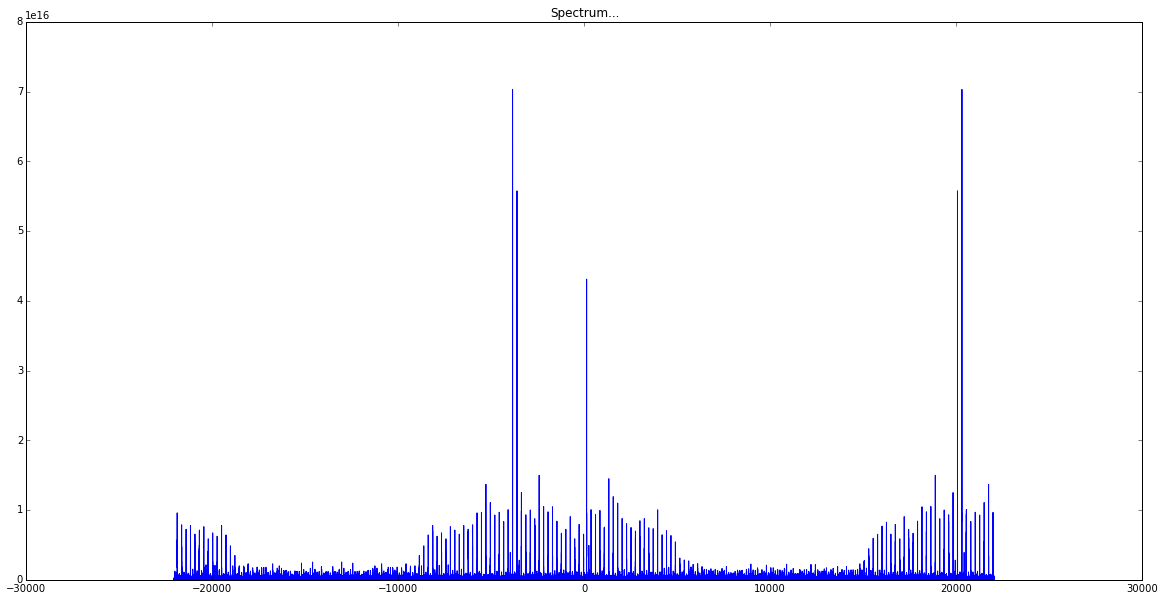

In [105]:
fig=plt.figure(1)
fig.set_size_inches(20, 10, forward=True)
plt.title('Spectrum...')
plt.plot(freqs[idx],pk[idx])
#plt.xlim(0.05,0.051)
#plt.plot(freqs,pk)